In [1]:
# Import Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set Working Directoy 
os.chdir('C:\\Hackathon Practice\\nov 14 2018\\Classification')
os.getcwd()


'C:\\Hackathon Practice\\nov 14 2018\\Classification'

In [3]:
# Load Dataset
data = pd.read_csv('Data\\mushroom_classification\\mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
# Target Variable is "Class" column.

print("\n", data['class'].value_counts())          # No Class Imbalance
print("\n", data['cap-surface'].value_counts())
print("\n", data['cap-shape'].value_counts())
print("\n", data['cap-color'].value_counts())
print("\n", data['bruises'].value_counts())
print("\n", data['odor'].value_counts())
print("\n", data['gill-attachment'].value_counts())
print("\n", data['gill-spacing'].value_counts())
print("\n", data['habitat'].value_counts())



 e    4208
p    3916
Name: class, dtype: int64

 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 f    4748
t    3376
Name: bruises, dtype: int64

 n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

 f    7914
a     210
Name: gill-attachment, dtype: int64

 c    6812
w    1312
Name: gill-spacing, dtype: int64

 d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


['p']
w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64
o    7488
t     600
n      36
Name: ring-number, dtype: int64


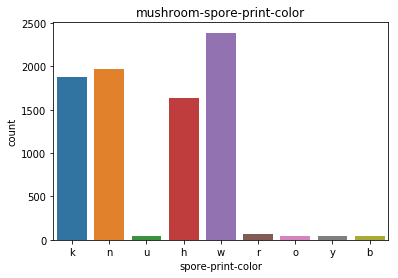

In [6]:
print(data['veil-type'].unique())         # There is only one category "p"
print(data['veil-color'].value_counts())         
print(data['ring-number'].value_counts())

sns.countplot(data['spore-print-color'])
plt.title('mushroom-spore-print-color')
plt.show()


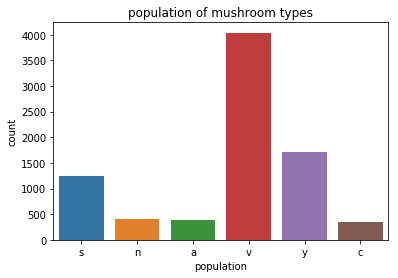

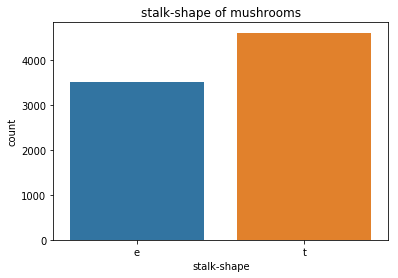

In [7]:
sns.countplot(data['population'])                  # Mushroom type "v" are in most number.
plt.title('population of mushroom types')
plt.show()

sns.countplot(data['stalk-shape'])                  
plt.title('stalk-shape of mushrooms')
plt.show()

# Data Preprocessing

## Removing Unnecessary Columns

In [8]:
# Removing "veil-type" column as there is only one category.

data = data.drop(labels=['veil-type'], axis=1)

## Train Test Split   ( Statified )

In [29]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'class']
Y = data[['class']]

trainX1, testX, trainY1, testY = train_test_split(X, Y, random_state=5, test_size=0.1, shuffle=True)
trainX, valX, trainY, valY = train_test_split(trainX1, trainY1, random_state=5, test_size=0.25, shuffle=True)

print(trainX1['veil-color'].value_counts())
print(trainX['veil-color'].value_counts())
print(testX['veil-color'].value_counts())


w    7127
n      89
o      88
y       7
Name: veil-color, dtype: int64
w    5337
n      74
o      66
y       6
Name: veil-color, dtype: int64
w    797
o      8
n      7
y      1
Name: veil-color, dtype: int64


## Label Encoding

In [30]:
from sklearn import preprocessing
import numpy as np

# Encoding TrainX Data
encoder = preprocessing.LabelEncoder()
trainX_encode = trainX.apply(encoder.fit_transform)       # Because Label Encoder Takes only 1-d Array as input.

# Encoding TestX Data
encoder1 = preprocessing.LabelEncoder()
testX_encode = testX.apply(encoder.fit_transform)

# Encoding TrainY Data
encoder2 = preprocessing.LabelEncoder()
trainY_encode = trainY.apply(encoder2.fit_transform)       # [0 = edible]  [1 = poisonous]

# Encoding TestY Data
encoder3 = preprocessing.LabelEncoder()
testY_encode = testY.apply(encoder3.fit_transform)


In [66]:
print(trainX_encode.info())
print(trainY_encode.info())
print(testX_encode.info())
print(testY_encode.info())
trainX_encode.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 970 to 4927
Data columns (total 21 columns):
cap-shape                   5483 non-null int32
cap-surface                 5483 non-null int32
cap-color                   5483 non-null int32
bruises                     5483 non-null int32
odor                        5483 non-null int32
gill-attachment             5483 non-null int32
gill-spacing                5483 non-null int32
gill-size                   5483 non-null int32
gill-color                  5483 non-null int32
stalk-shape                 5483 non-null int32
stalk-root                  5483 non-null int32
stalk-surface-above-ring    5483 non-null int32
stalk-surface-below-ring    5483 non-null int32
stalk-color-above-ring      5483 non-null int32
stalk-color-below-ring      5483 non-null int32
veil-color                  5483 non-null int32
ring-number                 5483 non-null int32
ring-type                   5483 non-null int32
spore-print-color          

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
970,2,0,4,0,5,1,1,0,5,1,...,0,2,7,7,2,1,0,3,3,1
5400,2,3,9,0,2,1,0,0,7,0,...,1,1,0,0,2,1,2,1,4,4
5392,3,2,0,1,5,1,0,0,1,0,...,2,2,2,7,2,2,0,7,1,6
2252,2,0,3,0,5,1,1,0,3,1,...,0,0,7,7,2,1,0,3,3,1
2109,2,0,3,1,5,1,0,0,7,1,...,2,2,7,7,2,1,4,2,4,0


## One Hot Encoding

In [32]:
# make a copy of original dataset
data1 = data.copy()

# Dummify the data.
X1 = data1.loc[:, data1.columns != 'class']
Y1 = data1[['class']]

# Dummifying Independent Variables and LabelEncoding Target Variable.
dummyX = pd.get_dummies(X1)        # 8124 rows, 117 cols.
encoder4 = preprocessing.LabelEncoder()
dummyY = Y1.apply(encoder4.fit_transform)

# Train Test Split.
train_X1, test_X, train_Y1, test_Y = train_test_split(dummyX, dummyY, random_state=5, test_size=0.1)
train_X, val_X, train_Y, val_Y = train_test_split(train_X1, train_Y1, random_state=5, test_size=0.25)


In [71]:
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

(5483, 116)
(5483, 1)
(1828, 116)
(1828, 1)


,class
970,0
5400,1
5392,0
2252,0
2109,0


# Model Building (Without Tuning)

## With Label Encoded Data

### Logistic Regression 

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

logistic = LogisticRegression()
logistic.fit(trainX_encode, trainY_encode)
print("Train Score ", logistic.score(trainX_encode, trainY_encode))        # Training 

y_pred = logistic.predict(testX_encode)                            # Testing
print("Test Score ", accuracy_score(testY_encode, y_pred))

print('Coefficient: \n', logistic.coef_)
# print('Intercept: \n', logistic.intercept_)

# print(confusion_matrix(testY_encode,y_pred))
print(classification_report(testY_encode, y_pred))


Train Score  0.950209739193872
Test Score  0.9384993849938499
Coefficient: 
 [[-0.03331663  0.45090941 -0.0636959  -0.81182709 -0.45845217 -1.55201314
  -6.15477182  7.00303198 -0.13820244 -0.1680689  -1.73701696 -4.05322521
  -0.23721038 -0.11170636 -0.03530141  6.22231146  1.14299914  0.76766817
  -0.30529116 -0.38491734  0.04446375]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       412
           1       0.95      0.93      0.94       401

   micro avg       0.94      0.94      0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813



In [114]:

imp_coef = pd.DataFrame({"coef":logistic.coef_, "columns":trainX.columns})
imp_coef.plot.bar(x="columns", y="coef")

Exception: Data must be 1-dimensional

### KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto',n_neighbors = 7)
knn.fit(trainX_encode, trainY_encode)

print("Train Score ", knn.score(trainX_encode, trainY_encode))
Y_hat = knn.predict(testX_encode)
#confusion_matrix(testY_encode,y_pred)

print("Test Score ", accuracy_score(testY_encode, Y_hat))
print(classification_report(testY_encode, Y_hat))



Train Score  0.9989057085537115
Test Score  0.997539975399754
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       401

   micro avg       1.00      1.00      1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813




### Decision Trees

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Train Score 1.0
Test Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       401

   micro avg       1.00      1.00      1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

imp_features:  [0.         0.         0.0038549  0.02821867 0.         0.
 0.         0.11740888 0.34991371 0.03124341 0.04914844 0.00408368
 0.00233458 0.01409126 0.         0.         0.00103976 0.0047196
 0.1911026  0.17801277 0.02482773]
      class
5350      1
7926      1
4804      1
56

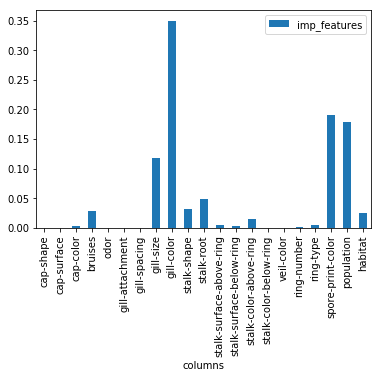

In [94]:
from sklearn.tree import DecisionTreeClassifier 

tree_learner = DecisionTreeClassifier()
print(tree_learner.fit(trainX_encode, trainY_encode))
print("Train Score", tree_learner.score(trainX_encode, trainY_encode))

y_new = tree_learner.predict(testX_encode)
print("Test Score", accuracy_score(testY_encode, y_new))
print(classification_report(testY_encode, y_new))

print("imp_features: ", tree_learner.feature_importances_)

feature_imp = pd.DataFrame({"imp_features":tree_learner.feature_importances_, "columns":trainX.columns})
feature_imp.plot.bar(x="columns", y="imp_features")


In [ ]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

### Random Forest

Train Score  1.0
Test Score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       401

   micro avg       1.00      1.00      1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

[0.         0.00193457 0.00446338 0.00970981 0.05240829 0.
 0.00044299 0.11068041 0.34556428 0.02221523 0.03954562 0.00066493
 0.00547021 0.00390035 0.01177027 0.00054462 0.00383582 0.00089774
 0.18213543 0.18928321 0.01453283]


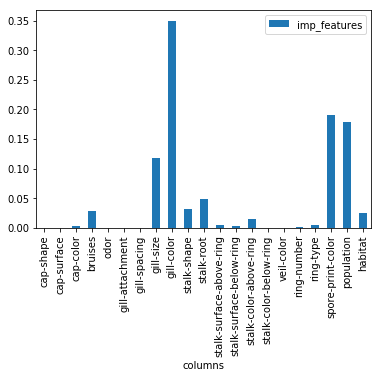

In [97]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 15, max_features = None)        # for None, it takes n-features
RFC.fit(trainX_encode, trainY_encode)
print("Train Score ", RFC.score(trainX_encode, trainY_encode))

Y_bar = RFC.predict(testX_encode)
print("Test Score ", accuracy_score(testY_encode, Y_bar))
print(classification_report(testY_encode, Y_bar))

print(RFC.feature_importances_)

feature_imp_RFC = pd.DataFrame({"imp_features":tree_learner.feature_importances_, "columns":trainX.columns})
feature_imp_RFC.plot.bar(x="columns", y="imp_features")

## With One Hot Encoded Data

### Logistic Regression

In [20]:

logistic = LogisticRegression()
logistic.fit(train_X, train_Y)
print("Train Score ", logistic.score(train_X, train_Y))        # Training 

y_pred1 = logistic.predict(val_X)                            # Testing
print("Test Score ", accuracy_score(val_Y, y_pred1))

print('Coefficient: \n', logistic.coef_)
# print('Intercept: \n', logistic.intercept_)

# print(confusion_matrix(testY_encode,y_pred))
print(classification_report(val_Y, y_pred1))


Train Score  1.0
Test Score  1.0
Coefficient: 
 [[ 0.2311465   0.64670988 -0.15187362  0.04133344 -0.49590814 -0.1527809
  -0.81361109  0.77160333  0.22016518 -0.05953024  0.95396648 -0.7963651
   0.03514923  0.01644653 -0.4002527   0.78575836 -0.22192202 -0.45925942
   0.43527098 -0.23016516  0.05351532  0.06511185 -2.6620523   2.55565979
   2.54326231 -2.61813425  0.34420459 -3.92193048  2.20090935  0.82303635
   0.85367182 -0.10677869  0.22540586  1.50263037 -1.3840032  -1.97168578
   2.09031295  1.8192033  -0.5192065   0.11831341  0.12020056 -0.44930379
  -0.64805249 -0.09795264 -0.444486    0.76644792 -0.30434752 -0.48448553
   0.24229645  0.68628801 -0.56766083 -0.53293605  2.28104504 -0.92127609
   0.15183177 -0.8600375  -0.61655966  1.55693242 -1.00962351  0.18787792
  -1.05497482  0.43470501 -0.41137833  1.15027532  0.21140299  0.34420459
  -0.40754221 -0.36022691 -0.12290321 -0.30798569  0.2727263  -0.08188032
   0.57083163  0.13337591  0.34420459 -0.33527129 -0.30893989 -0.9

### KNN

In [101]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors = 7)
knn.fit(train_X, train_Y)

print("Train Score ", knn.score(train_X, train_Y))
Y_hat1 = knn.predict(val_X)
#confusion_matrix(testY_encode,y_pred)

print("Test Score ", accuracy_score(val_Y, Y_hat1))
print(classification_report(val_Y, Y_hat1))

Train Score  1.0
Test Score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       959
           1       1.00      1.00      1.00       869

   micro avg       1.00      1.00      1.00      1828
   macro avg       1.00      1.00      1.00      1828
weighted avg       1.00      1.00      1.00      1828



### Decision Trees

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Train Score 0.9990880904614262
Test Score 0.9972647702407003
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       959
           1       1.00      0.99      1.00       869

   micro avg       1.00      1.00      1.00      1828
   macro avg       1.00      1.00      1.00      1828
weighted avg       1.00      1.00      1.00      1828

imp_features
 [0.         0.         0.         0.         0.         0.
 0.         0.00218126 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00218692 0.         0.         0.02677695 0.
 0.         0.

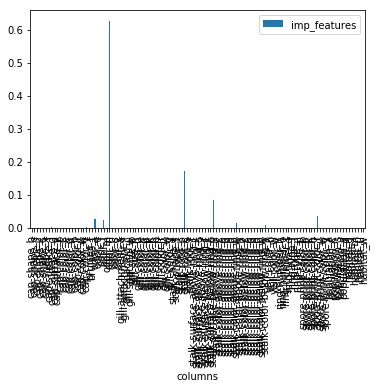

In [87]:
tree_learner = DecisionTreeClassifier(min_samples_split=50, max_depth=5)
print(tree_learner.fit(train_X, train_Y))
print("Train Score", tree_learner.score(train_X, train_Y))

y_new1 = tree_learner.predict(val_X)
print("Test Score", accuracy_score(val_Y, y_new1))
print(classification_report(val_Y, y_new1))

print("imp_features\n", tree_learner.feature_importances_)

feature_imp1 = pd.DataFrame({"imp_features":tree_learner.feature_importances_, "columns":train_X.columns})
feature_imp1.plot.bar(x="columns", y="imp_features")


### Random Forest

Train Score  1.0
Test Score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       959
           1       1.00      1.00      1.00       869

   micro avg       1.00      1.00      1.00      1828
   macro avg       1.00      1.00      1.00      1828
weighted avg       1.00      1.00      1.00      1828

imp_features
 [0.00000000e+00 7.75555691e-04 0.00000000e+00 3.22957701e-07
 0.00000000e+00 0.00000000e+00 4.43696852e-05 2.03106407e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.26381159e-03
 2.24102082e-02 3.61216748e-02 1.25513815e-02 0.00000000e+00
 7.22316254e-03 1.00837102e-02 0.00000000e+00 6.19260477e-01
 2.79334078e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31996382e-04
 3.05372182e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 

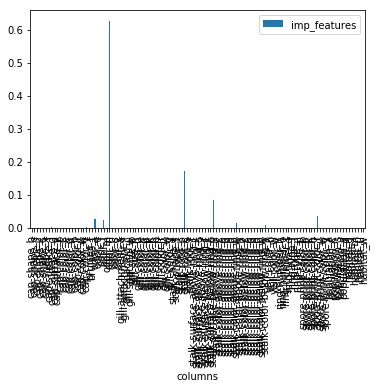

In [91]:
RFC = RandomForestClassifier(n_estimators = 15, max_features = None)        # for None, it takes n-features
RFC.fit(train_X, train_Y)
print("Train Score ", RFC.score(train_X, train_Y))

Y_bar1 = RFC.predict(val_X)
print("Test Score ", accuracy_score(val_Y, Y_bar1))
print(classification_report(val_Y, Y_bar1))

print("imp_features\n", RFC.feature_importances_)

feature_imp_RFC1 = pd.DataFrame({"imp_features":tree_learner.feature_importances_, "columns":train_X.columns})
feature_imp_RFC1.plot.bar(x="columns", y="imp_features")

# Model Bulding (With Tuning)

## Logistic Regression

In [ ]:
# Logistic Regression with Parameter Tuning

c_space = np.logspace(start=1, stop=20, num=1)   # grid of values to tune C
param_grid = {'C': c_space}                      # Setup the hyperparameter grid by using c_space

start = timeit.default_timer()

logistic = LogisticRegression(solver='lbfgs')
grid_cv = GridSearchCV(logistic, param_grid, cv = 5)
grid_cv.fit(trainX_obj_dummy, trainY)
print("Train Score ",grid_cv.score(trainX_obj_dummy, trainY))

y_pred = grid_cv.predict(testX_obj_dummy)
print("Test Score ",accuracy_score(testY, y_pred))

stop = timeit.default_timer()
print('Time: ', stop - start) 

print("Tuned Logistic Regression Parameters: {}".format(grid_cv.best_params_))
print("Best score is {}".format(grid_cv.best_score_))


## Decision Trees

In [116]:
import numpy as np
import time
import timeit
from sklearn.model_selection import GridSearchCV

params = {'min_samples_split':range(2,15,1), 
          'min_samples_leaf':range(1,10,1),
          'max_depth':range(5,20,1)
          }

start = timeit.default_timer()

tree_learner = DecisionTreeClassifier()
grid_cv2 = GridSearchCV(tree_learner, param_grid = params, n_jobs=10, cv=10)
grid_cv2.fit(train_X, train_Y)
print("Train Score  ",grid_cv2.score(train_X, train_Y))

y_caps1 = grid_cv2.predict(val_X)
print("Test Score   ", accuracy_score(val_Y, y_caps1))

stop = timeit.default_timer()
print('Time: ', stop - start) 
    
print("Best Hyper Parameters:",grid_cv2.best_params_)
print("Best Accuracy:",grid_cv2.best_score_)
print('Test Accuracy',accuracy_score(val_Y, y_caps1))

Train Score   1.0
Test Score    1.0
Time:  256.55493357933415
Best Hyper Parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 1.0
Test Accuracy 1.0


## RandomizedSearchCV

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

start = timeit.default_timer()

dt = tree.DecisionTreeClassifier() 
params = {'min_samples_split':range(2,15,1), 
          'min_samples_leaf':range(1,10,1),
          'max_depth':range(5,20,1)
          }

rsearch = RandomizedSearchCV(estimator=dt, param_distributions=params, n_iter=500, cv=10)
rsearch.fit(train_X, train_Y)

stop = timeit.default_timer()
print('Time: ', stop - start) 

print(rsearch.best_score_)
print(rsearch.best_estimator_)
print('Test Accuracy',rsearch.score(val_X, val_Y))

Time:  127.44502655208203
1.0
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Test Accuracy 1.0
